# **ISE 330 PSet 3**
Michael Blumberg - 6785198310

# Importing Necessary Modules

In [ ]:
!pip install -q ortools
from ortools.linear_solver import pywraplp

#**Question 1**
Convert the following optimization problems into linear programs (they do
not have to be in standard form), and solve the resulting linear program:

\begin{align*}
    \text{(1a) }
    \text{Minimize} \quad & |x_1 - x_2| + 3|2x_2 - x_3| \\
    \text{subject to} \quad & 3x_1 + 2x_2 - x_3 \leq 4, \\
    & x_1, x_2, x_3 \geq 0.
\end{align*}

\begin{align*}
     \text{(1b) }\text{Minimize} \quad & |x_1| + 3 \max \{|2 - x_2| , |2 - x_1 + x_3|\} \\
    \text{subject to} \quad & |x_2| \leq 1.
\end{align*}

## **Question 1a**

### Linear Program Transformation
We can easily transform this problem into a linear program by replacing the absolute value terms with "dummy variables":

\begin{align*}
  \text{Minimize } s+3t \\
  \text{subject to } 3x_1 + 2x_2 - x_3 \leq 4, \\
  x_1, x_2, x_3 \geq 0, \\
  s \geq x_1 - x_2, \\
 s \geq -(x_1 - x_2), \\
 t \geq 2x_2-x_3, \\
 t \geq -(2x_2-x_3).
\end{align*}

### Solver Code

In [ ]:
solver_1a = pywraplp.Solver.CreateSolver('CBC')

# Add the variables
s = solver_1a.NumVar(0, solver_1a.infinity(), 's') # lower bound is 0 due to absolute value constraint
t = solver_1a.NumVar(0, solver_1a.infinity(), 't')
x1 = solver_1a.NumVar(0, solver_1a.infinity(), 'x1')
x2 = solver_1a.NumVar(0, solver_1a.infinity(), 'x2')
x3 = solver_1a.NumVar(0, solver_1a.infinity(), 'x3')

# Set the objective function
solver_1a.Minimize(s + 3*t)

# Add the constraints
solver_1a.Add(3*x1 + 2*x2 - x3 <= 4)
solver_1a.Add(s >= x1 - x2)
solver_1a.Add(s >= -(x1 - x2))
solver_1a.Add(t >= 2*x2 - x3)
solver_1a.Add(t >= -(2*x2 - x3))

status = solver_1a.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Objective value = ' + str(solver_1a.Objective().Value()))
    print('s =', s.solution_value())
    print('t =', t.solution_value())
    print('x1 =', x1.solution_value())
    print('x2 =', x2.solution_value())
    print('x3 =', x3.solution_value())


Objective value = 0.0
s = 0.0
t = 0.0
x1 = 1.3333333333333333
x2 = 1.3333333333333333
x3 = 2.6666666666666665


**The optimal solution has an objective value of 0, with $x_1=\frac{4}{3}, x_2=\frac{4}{3}, x_3=\frac{8}{3}$.**

##**Question 1b**

###Linear Program Transformation
We can perform a similar operation as before by replacing the terms within the max and the abasolute value functions with dummy variables.  
    \\

\begin{align*}
     \text{Minimize} \quad & |x_1| + 3 \max \{|2 - x_2| , |2 - x_1 + x_3|\} \\
    \text{subject to} \quad & |x_2| \leq 1.
    \\
    \\
\end{align*}

The above optimization problem becomes:

\begin{align*}
    \text{Minimize} \quad & t + 3s \\
    \text{subject to } \\
    -1 \geq x_2 \geq 1, \\
    t \geq x_1, \\
    t \geq -(x_1), \\
    a \geq 2-x_2, \\
    a \geq -(2-x_2), \\
    b \geq 2-x_1+x_3, \\
    b \geq -(2-x_1+x_3), \\
    s \geq a, \\
    s \geq b.
\end{align*}


### Solver Code

In [ ]:
solver_1b = pywraplp.Solver.CreateSolver('CBC')

# Add the variables
s = solver_1b.NumVar(0, solver_1b.infinity(), 's') # lower bound is 0 due to absolute value constraint
t = solver_1b.NumVar(0, solver_1b.infinity(), 't')
a = solver_1b.NumVar(0, solver_1b.infinity(), 'a')
b = solver_1b.NumVar(0, solver_1b.infinity(), 'b')
x1 = solver_1b.NumVar(-(solver_1b.infinity()), solver_1b.infinity(), 'x1')
x2 = solver_1b.NumVar(0, solver_1b.infinity(), 'x2')
x3 = solver_1b.NumVar(-(solver_1b.infinity()), solver_1b.infinity(), 'x3')

# Set the objective function
solver_1b.Minimize(t + 3*s)

# Add the constraints
solver_1b.Add(-1 <= x2 <= 1)
solver_1b.Add(t >= x1)
solver_1b.Add(t >= -(x1))
solver_1b.Add(a >= 2-x2)
solver_1b.Add(a >= -(2-x2))
solver_1b.Add(b >= 2-x1+x3)
solver_1b.Add(b >= -(2-x1+x3))
solver_1b.Add(s >= a)
solver_1b.Add(s >= b)

status = solver_1b.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Objective value = ' + str(solver_1b.Objective().Value()))
    print('s =', s.solution_value())
    print('t =', t.solution_value())
    print('a =', a.solution_value())
    print('b =', b.solution_value())
    print('x1 =', x1.solution_value())
    print('x2 =', x2.solution_value())
    print('x3 =', x3.solution_value())


Objective value = 3.0
s = 1.0
t = 0.0
a = 1.0
b = 1.0
x1 = -0.0
x2 = 1.0
x3 = -1.0


**The optimal solution has an objective value of 3, with $x_1=0, x_2=1, x_3=-1$.**

# **Question 2**

## **Question 2a**

Solve a transportation problem involving 3 warehouses and 4 stores, where all three warehouses begin with 50 units of product and the stores have demands of 15, 30, 45, 60 respectively. Assume that the cost matrix is:
\begin{align*}
\
C =
\begin{bmatrix}
    5 & 10 & 9 & 8 \\
    10 & 7 & 10 & 8 \\
    8 & 1 & 7 & 4
\end{bmatrix}
\end{align*}

## **Question 2b**
Suppose that each warehouse now has 60 units of product, but the demands remain the same (thus the warehouses do not necessarily ship out all of their supply). How much does the objective value change? Which warehouses have leftover inventory?

# **Question 3**

Solve the following linear programs using the graphical method (note that the first problem has the same feasible region as in the example from lecture):

## **Question 3a**

\begin{align*}
    \text{Maximize} \quad & 2x_1 + 6x_2 \\
    \text{subject to} \quad & 6x_1 + 4x_2 \leq 24, \\
    & x_1 + 2x_2 \leq 6, \\
    & -x_1 + x_2 \leq 1, \\
    & x_2 \leq 2, \\
    & x_1, x_2 \geq 0.
\end{align*}

### Graphical Method

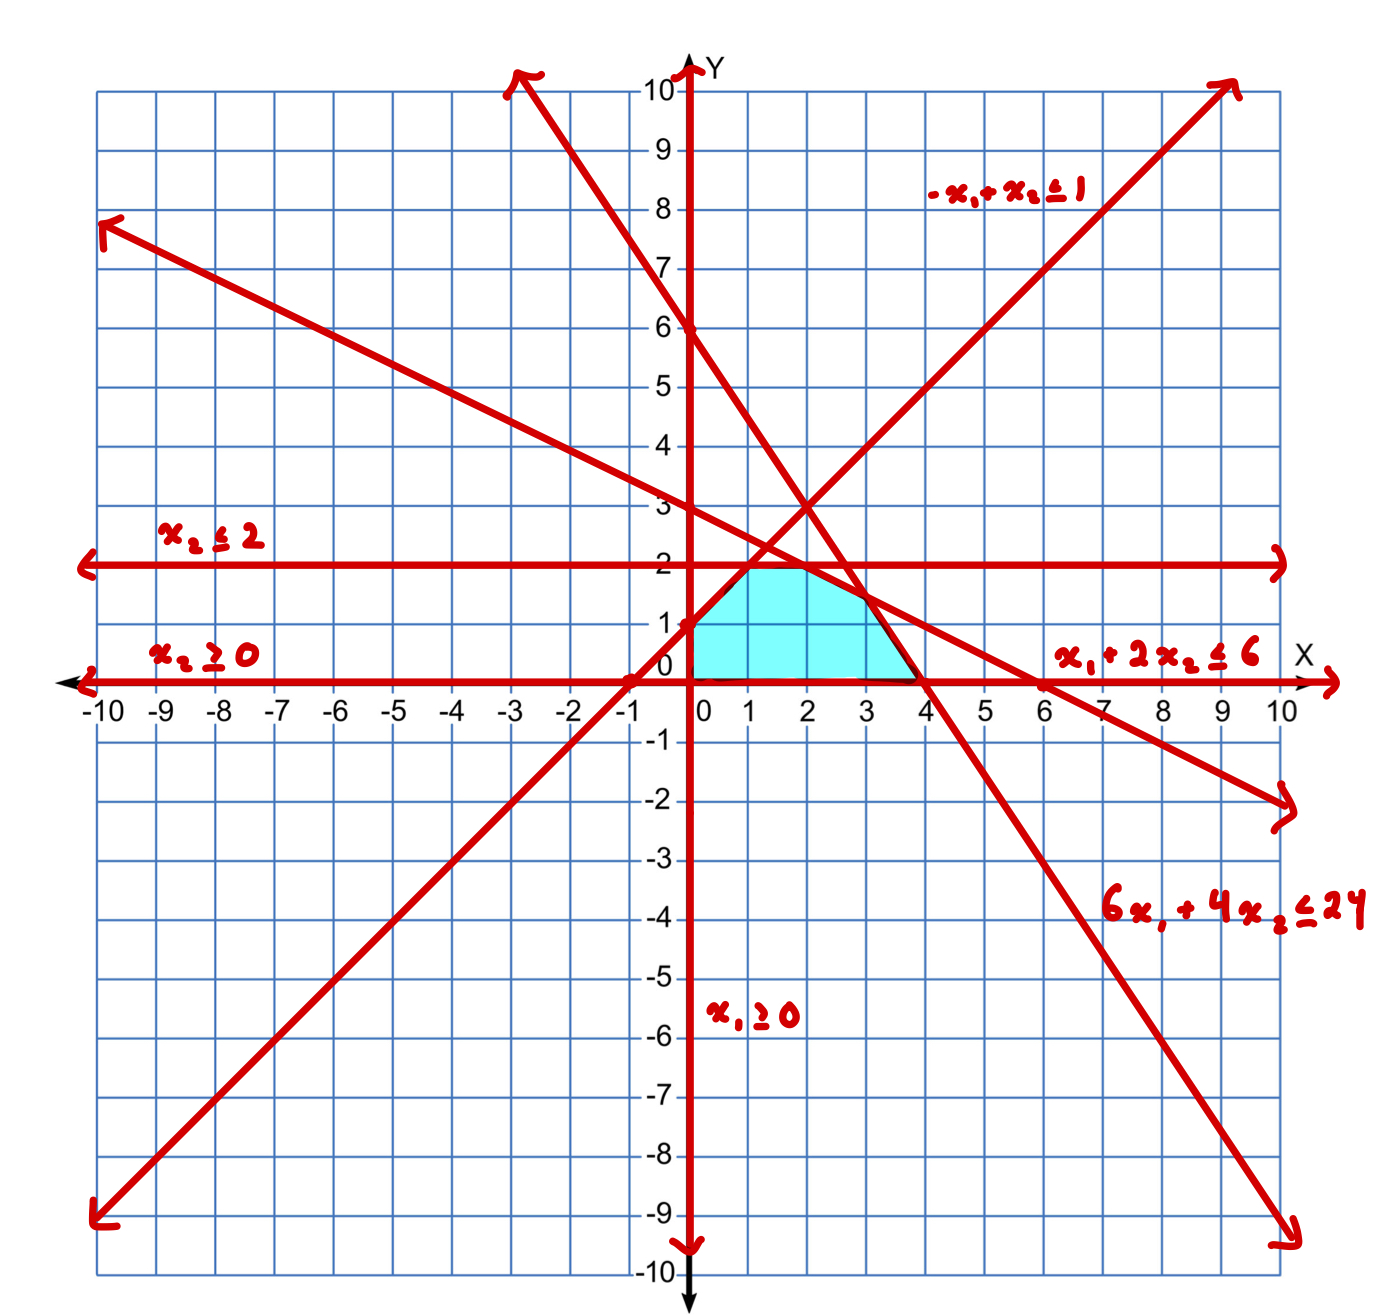

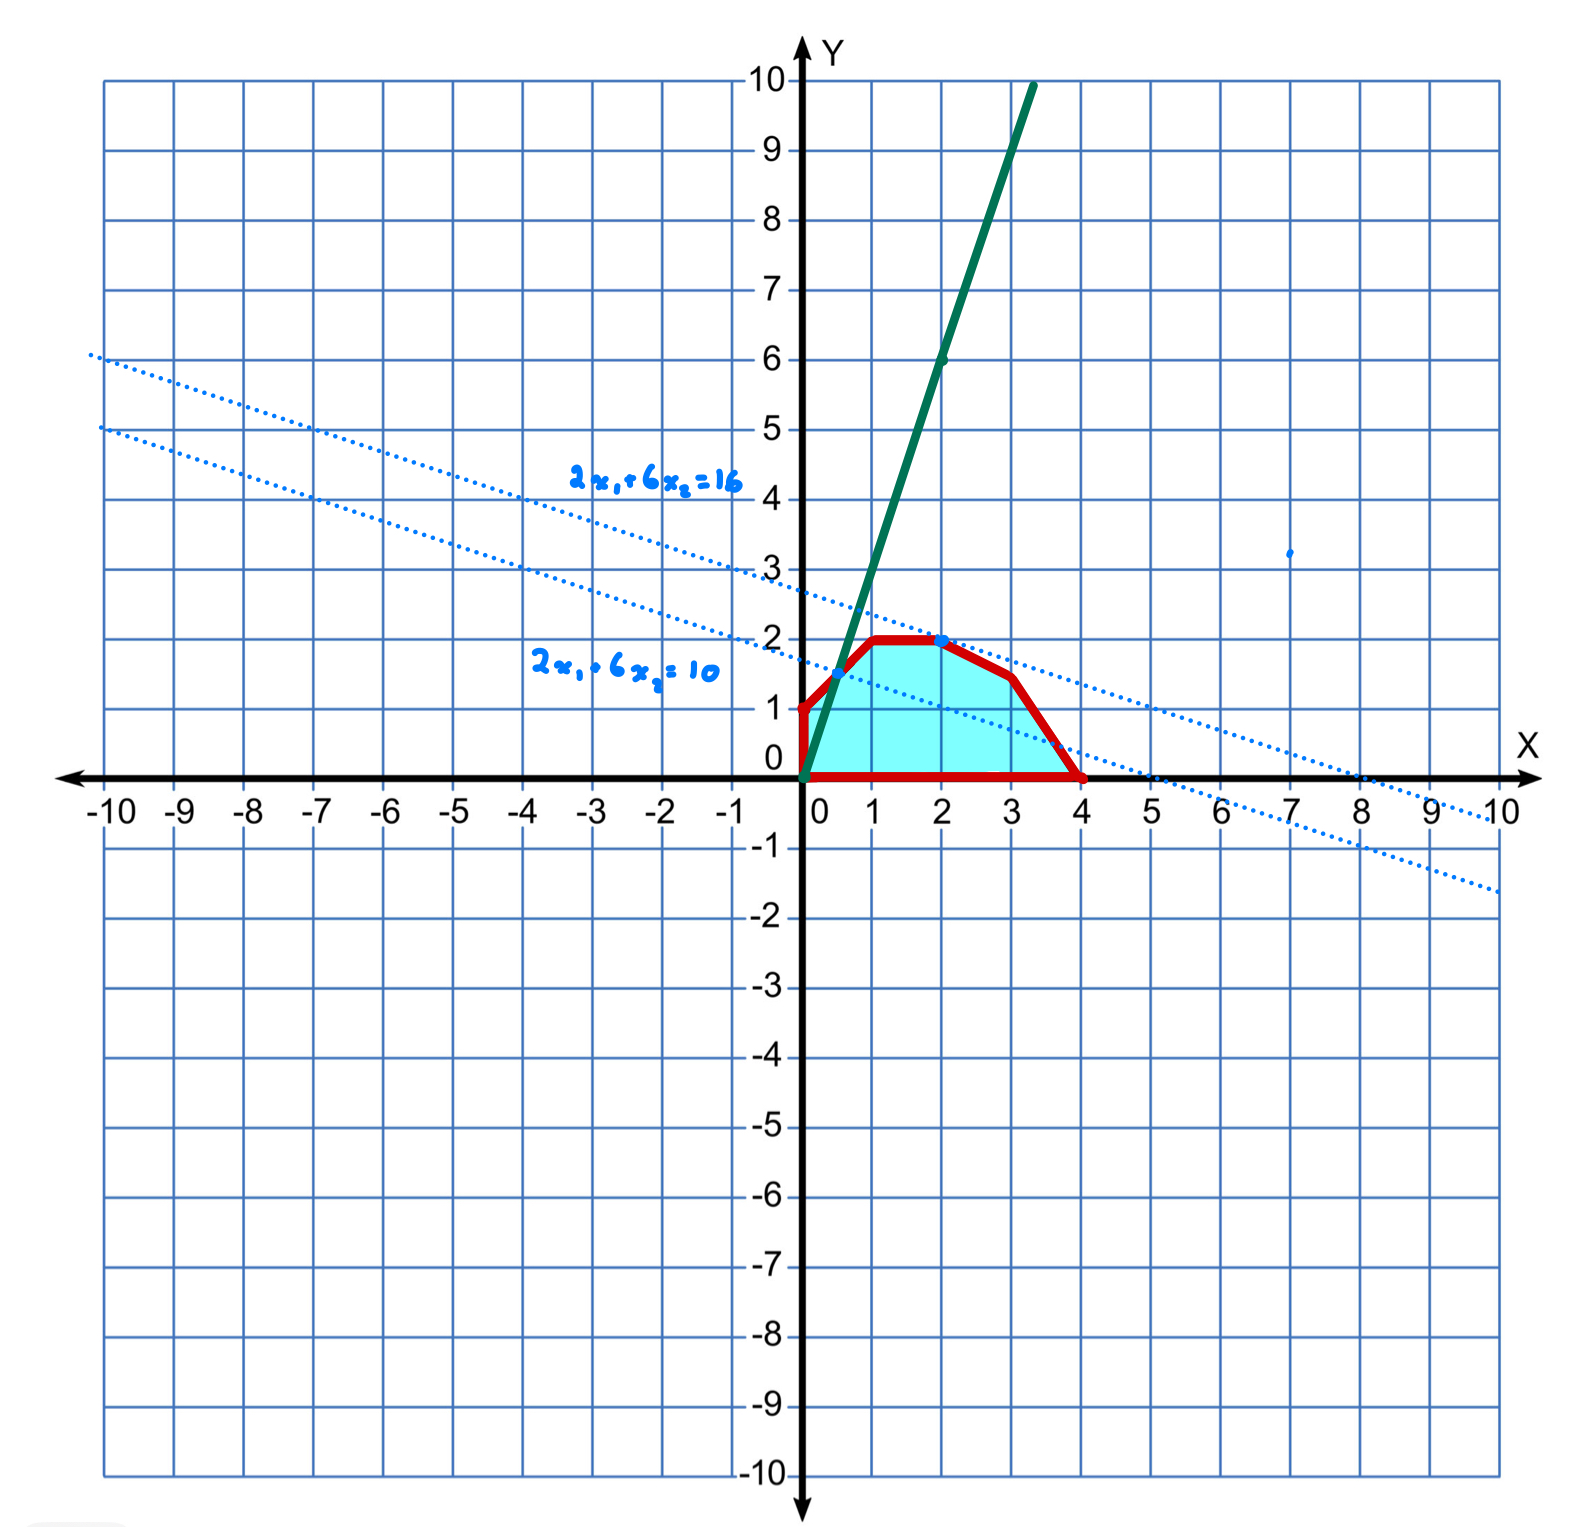

**According to the graphical method, the maximum value under the constraints is 16, when $x_1 = 2, x_2= 2$**

### Programmed Solution

In [ ]:
solver_3a = pywraplp.Solver.CreateSolver('CBC')

# Add the variables
x1 = solver_3a.NumVar(-(solver_3a.infinity()), solver_3a.infinity(), 'x1')
x2 = solver_3a.NumVar(-(solver_3a.infinity()), solver_3a.infinity(), 'x2')

# Set the objective function
solver_3a.Maximize(2 * x1 + 6 * x2)

# Add the constraints
solver_3a.Add(6 * x1 + 4* x2 <= 24)
solver_3a.Add(x1 + 2 * x2 <= 6)
solver_3a.Add(-x1 + x2 <= 1)
solver_3a.Add(0 <= x2 <= 2)
solver_3a.Add(x1 >= 0)

status = solver_3a.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Objective value = ' + str(solver_3a.Objective().Value()))
    print('x1 =', x1.solution_value())
    print('x2 =', x2.solution_value())

Objective value = 16.0
x1 = 2.0
x2 = 2.0


*The above code gives the same result as the graphical method.*

## **Question 3b**

\begin{align*}
 \text{Maximize} \quad & 3x_1 + x_2 \\
    \text{subject to} \quad & 4x_1 + 5x_2 \leq 43, \\
    & -3x_1 + 2x_2 \geq -15, \\
    & x_2 \leq 7, \\
    & x_1, x_2 \geq 0.
\end{align*}

### Graphical Method

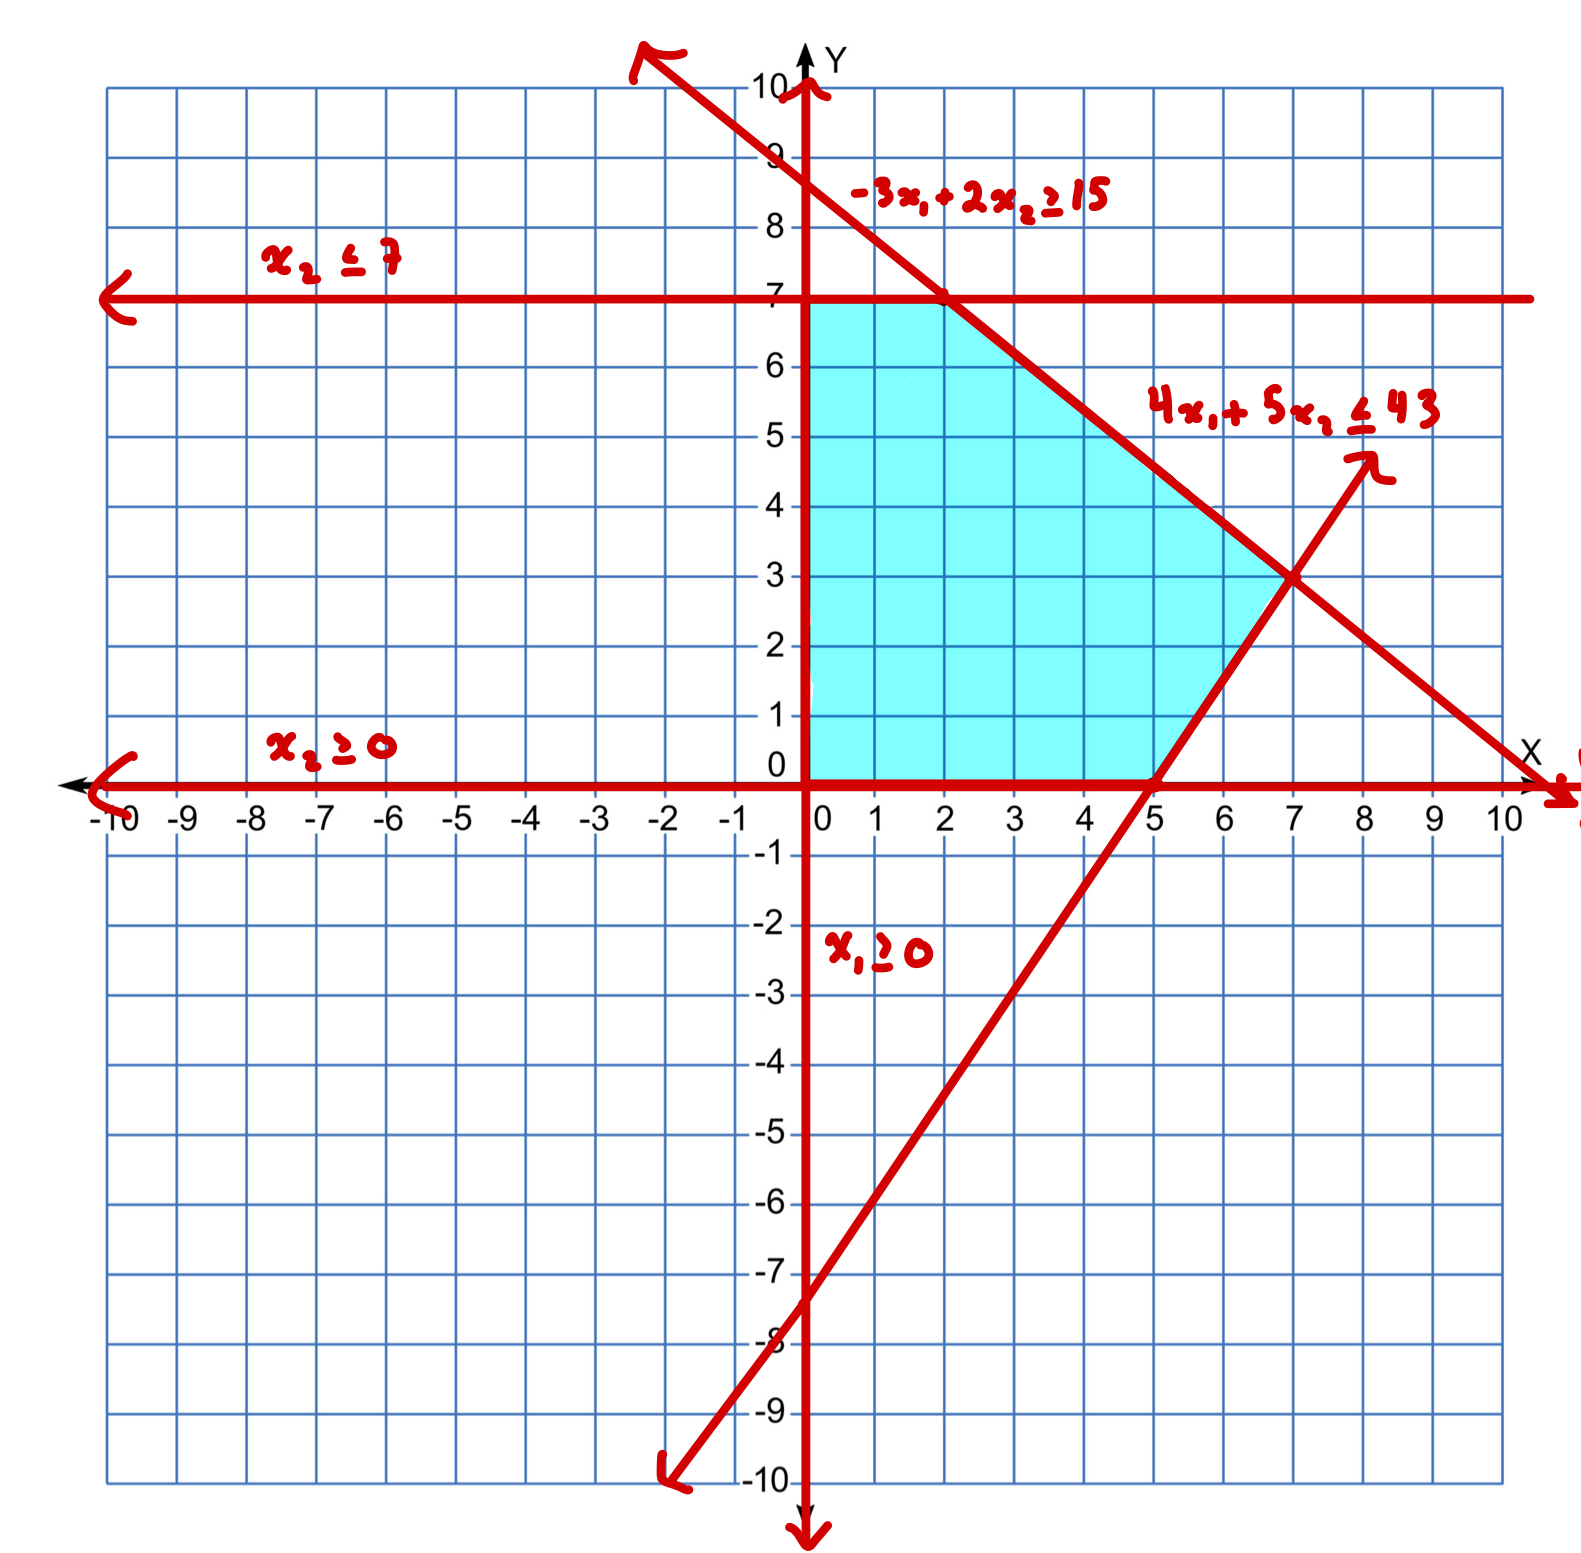

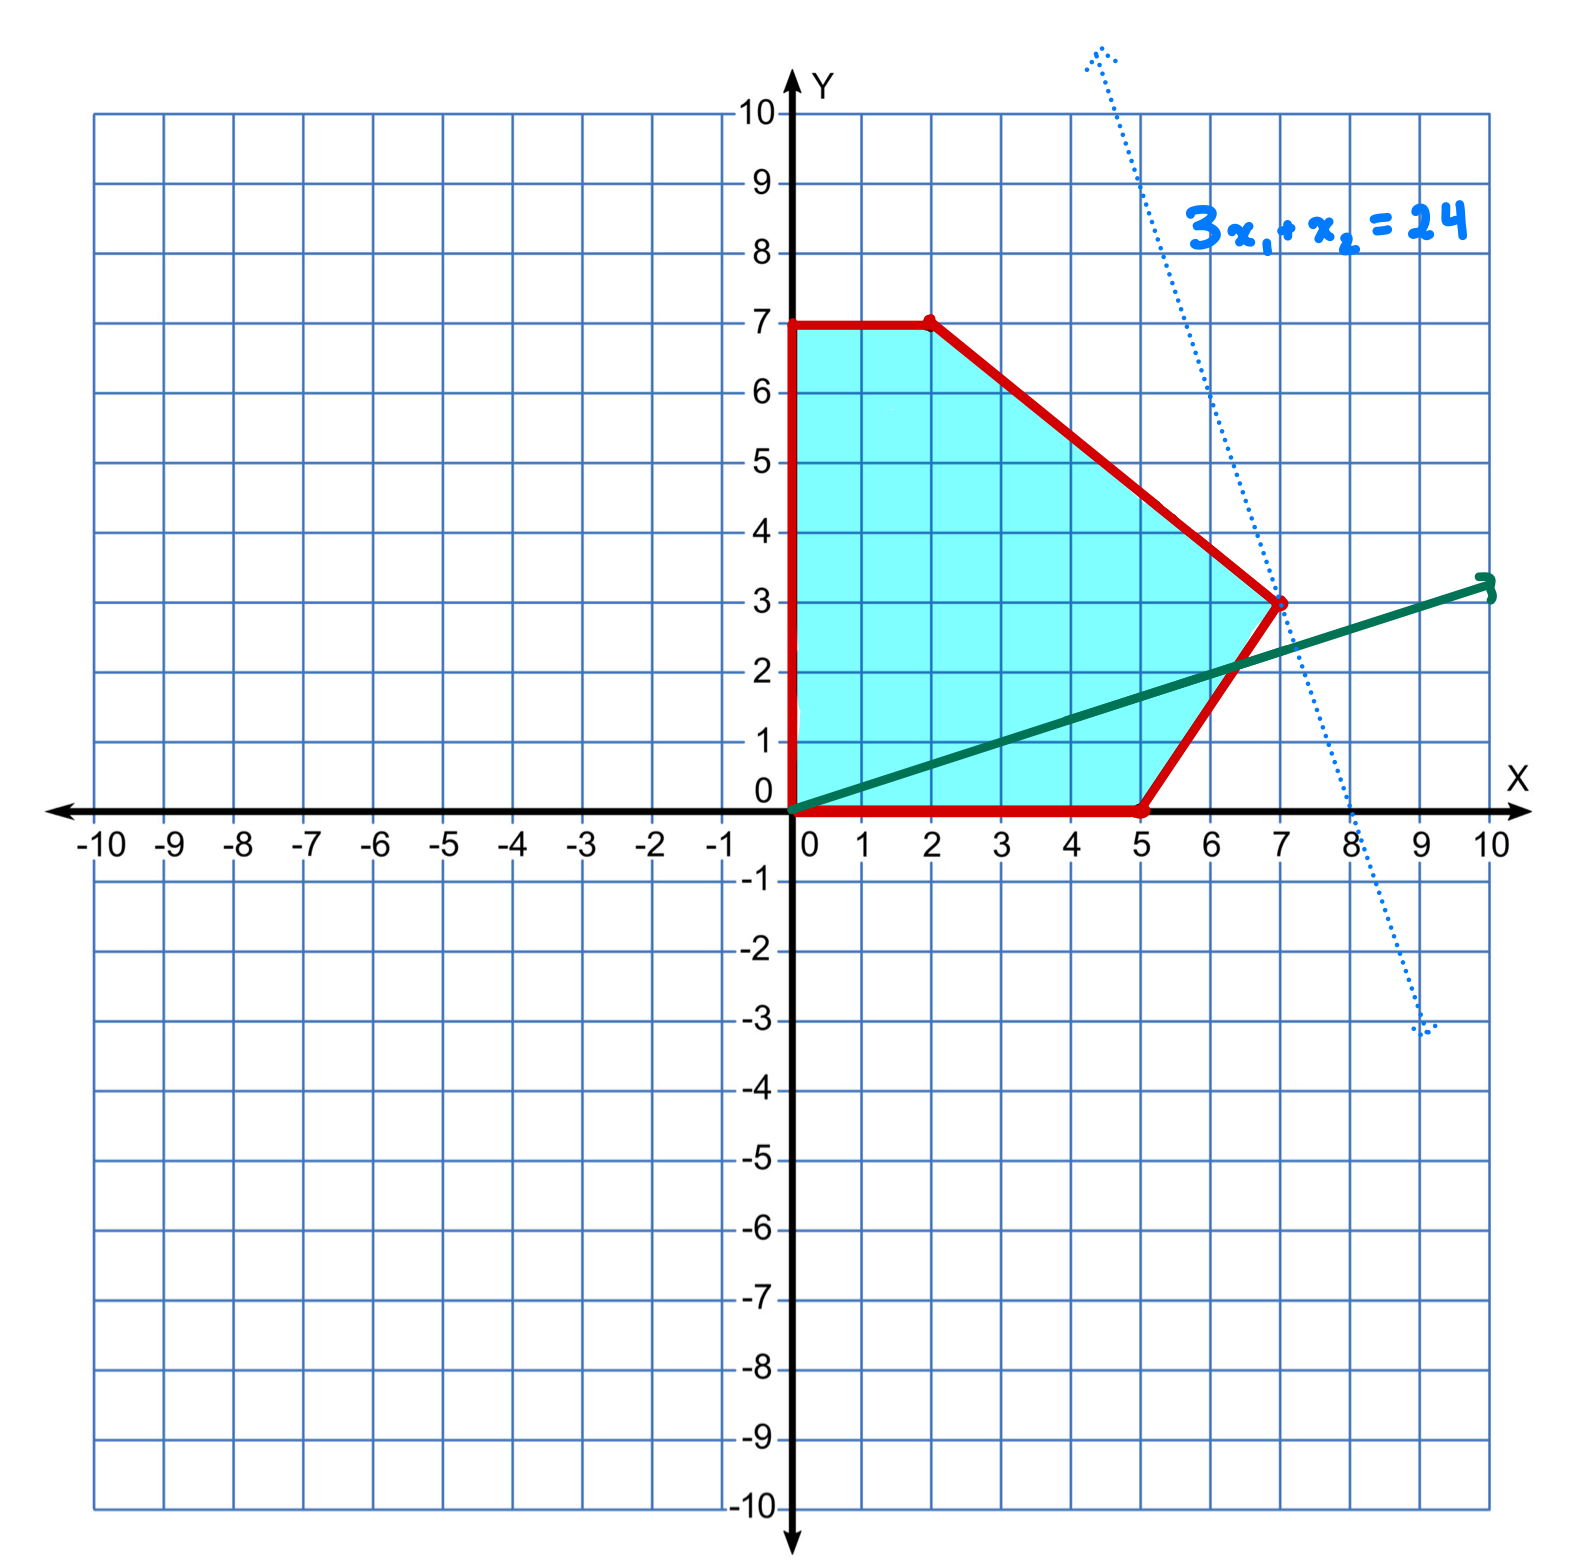

**According to the graphical method, the maximum value under the constraints is 24, when $x_1 = 7, x_2= 3$**

### Programmed Solution

In [ ]:
solver_3b = pywraplp.Solver.CreateSolver('CBC')

# Add the variables
x1 = solver_3b.NumVar(-(solver_3a.infinity()), solver_3a.infinity(), 'x1')
x2 = solver_3b.NumVar(-(solver_3a.infinity()), solver_3a.infinity(), 'x2')

# Set the objective function
solver_3b.Maximize(3 * x1 + x2)

# Add the constraints
solver_3b.Add(4 * x1 + 5 * x2 <= 43)
solver_3b.Add(-3 * x1 + 2 * x2 >= -15)
solver_3b.Add(0 <= x2 <= 7)
solver_3b.Add(x1 >= 0)

status = solver_3b.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Objective value = ' + str(solver_3b.Objective().Value()))
    print('x1 =', x1.solution_value())
    print('x2 =', x2.solution_value())

Objective value = 24.0
x1 = 7.0
x2 = 3.0


*The above code gives the same result as the graphical method.*